<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for immage classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [1]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
# import os
#os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
from keras.callbacks import TensorBoard

In [3]:
# insert code here

## Import libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from sklearn.metrics import confusion_matrix

import tensorflow as tf

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPool2D, Dropout
from keras.layers import Flatten
from tensorflow.keras.utils import to_categorical

## Load data
Use the **Keras**' load method.

In [4]:
# insert code here

(X_train_all, t_train_all), (X_test_all, t_test_all) = tf.keras.datasets.cifar10.load_data()

## Check some data

In [5]:
size = 50000
X_train = X_train_all[:size,:,:,:]
t_train = t_train_all[0:size,:]
X_test = X_test_all[0:size,:,:,:]
t_test = t_test_all[0:size,:]

In [6]:
classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck')

X_train = X[train].copy()
X_test  = X[test].copy()
y_train = y[train].copy()
y_test  = y[test].copy()

In [7]:
# insert code here

def check_one(data, label, id = None, actual = None, compare = False):
    # check one
    if id is None:
        id = np.random.randint(data.shape[0])
    im = data[id]
    plt.figure(figsize = (3, 3))
    plt.imshow(im)
    
    l_id = label[id]
    if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
        a_id = np.argmax(actual[id])
        plt.title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
    else:
        plt.title('Class %d (%s)' % (l_id, classes[l_id]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [8]:
def check_ten(data, label, actual = None, compare = False):
    # check ten
    fig, ax = plt.subplots(2, 5, figsize = (11, 5))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.2)
    fig.suptitle('Check Data', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})

    ids = np.random.randint(data.shape[0], size = 10)
    r = 0
    c = 0
    for id in ids:
        im = data[id]

        # original image
        ax[r, c].imshow(im)
        l_id = label[id]
        if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
            a_id = np.argmax(actual[id])
            ax[r, c].set_title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
        else:
            ax[r, c].set_title('Class %d (%s)' % (l_id, classes[l_id]))
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

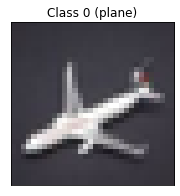

In [9]:
check_one(X_train, t_train.flatten())

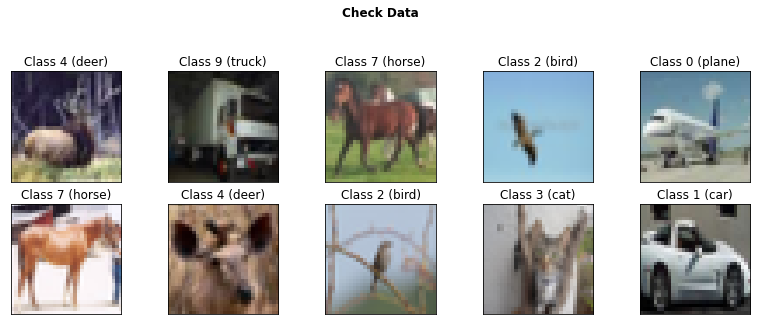

In [10]:
check_ten(X_train, t_train.flatten())

## Prepare data

In [11]:
# insert code here
# Prepare input data
_, img_rows, img_cols, img_channels = X_train.shape
num_classes = len(set(t_train.flatten()))

# Convert the target to categorical
y_train = to_categorical(
    t_train,
    num_classes = num_classes,
    dtype = 'uint8')
y_test = to_categorical(
    t_test,
    num_classes = num_classes,
    dtype = 'uint8')

In [12]:
# Checking shape of input data
X_train.shape

(50000, 32, 32, 3)

In [13]:
y_train.shape

(50000, 10)

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [14]:
# insert code here 

model = Sequential()

# Add a convolutional layer
model.add(Conv2D(60,
                 kernel_size = 3,
                 activation = 'relu',
                 padding = 'valid',
                 input_shape = (img_rows, img_cols, 3)))

# Add another convolutional layer
model.add(Conv2D(30,
                 kernel_size = 2,
                 activation = 'relu'))

# Flatten the output of the convolutional layer
model.add(Flatten())

# Add an output layer for the 3 categories
model.add(Dense((y_train.shape),
                activation = 'softmax'))

In [15]:
model.add(Conv2D(48, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(Conv2D(48, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(192, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(192, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

## Compile the model

In [16]:
# insert code here

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

## Fit the training data

In [21]:
# Uncomment the statement below to allow online monitoring with TensorBoard
tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs

In [22]:
%%time
# insert code here

history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 25, batch_size = 100, callbacks = [tensorboard], verbose = 1)
print(f'Training accuracy:{history.history["accuracy"][-1]:.2f} validation accuracy:{history.history["val_accuracy"][-1]:.2f} ')


# cdgddgcvdgeygdcvdgyegdcvgdeygdcvdgeydgcvdgeygdcvdgeydgcvgdyedgcv
# ..., callbacks = [tensorboard], ...

#callbacks = [tensorboard],

Epoch 1/25
400/400 [==============================] - 102s 255ms/step - loss: 2.3029 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1021
Epoch 2/25
400/400 [==============================] - 100s 251ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 3/25
400/400 [==============================] - 130s 325ms/step - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 4/25
400/400 [==============================] - 138s 346ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 5/25
400/400 [==============================] - 128s 321ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 6/25
400/400 [==============================] - 125s 314ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 7/25
400/400 [==============================] - 126s 314ms/step - loss: 2.3027 - accuracy: 0.1010 - val_loss: 2.3027 -

In [24]:
# Takes hours

#history = model.fit(X_train,y_train,validation_split = 0.25,batch_size = 20,epochs = 100,verbose = 1)

### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit. 
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [25]:
%load_ext tensorboard
%tensorboard --logdir logs

## Create predictions

In [31]:
%%time
predictions = np.argmax(model.predict(X_test),axis=1)

CPU times: total: 25.7 s
Wall time: 3.56 s


## Evaluate the model

In [32]:
# insert code here

score = model.evaluate(X_test, y_test, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

1000/1000 [==============================] - 7s 7ms/step - loss: 2.3026 - accuracy: 0.1000

Test loss: 2.302606, Test accuracy: 0.100000


## Visualisation of cost

In [33]:
# insert code here

def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_c = ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)
    else: # make dense
        c = '%%%dd ' % d_size
        s = '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%%%dd| ' % d_size
            s = s % i
            s += c * len(r)
            print(s % tuple(r))

In [34]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

    |    0    1    2    3    4    5    6    7    8    9 
--------------------------------------------------------
   0|    0    0 1000    0    0    0    0    0    0    0 
   1|    0    0 1000    0    0    0    0    0    0    0 
   2|    0    0 1000    0    0    0    0    0    0    0 
   3|    0    0 1000    0    0    0    0    0    0    0 
   4|    0    0 1000    0    0    0    0    0    0    0 
   5|    0    0 1000    0    0    0    0    0    0    0 
   6|    0    0 1000    0    0    0    0    0    0    0 
   7|    0    0 1000    0    0    0    0    0    0    0 
   8|    0    0 1000    0    0    0    0    0    0    0 
   9|    0    0 1000    0    0    0    0    0    0    0 


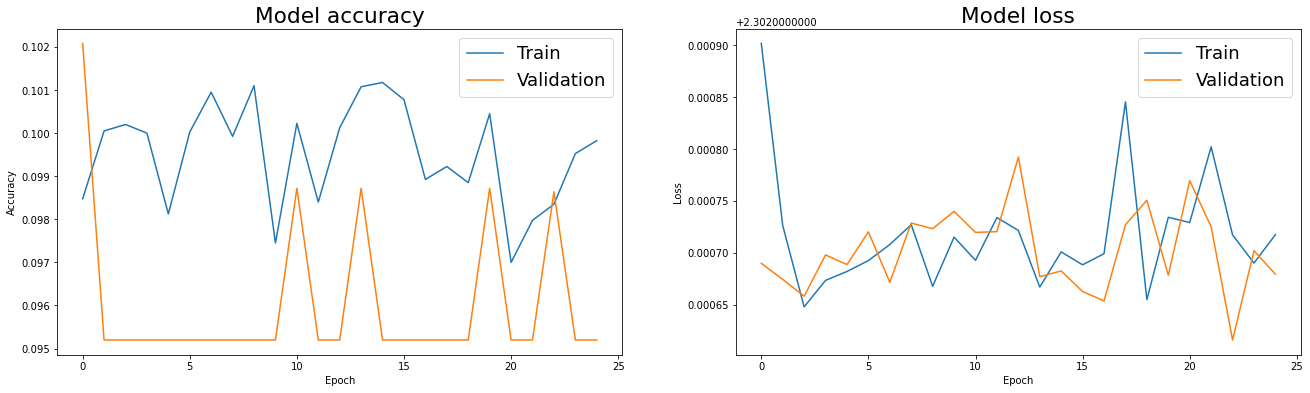

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

## Results

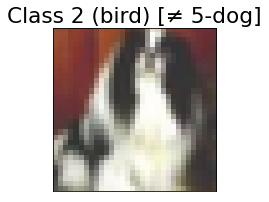

In [36]:
check_one(X_test, predictions, actual = y_test, compare = True)

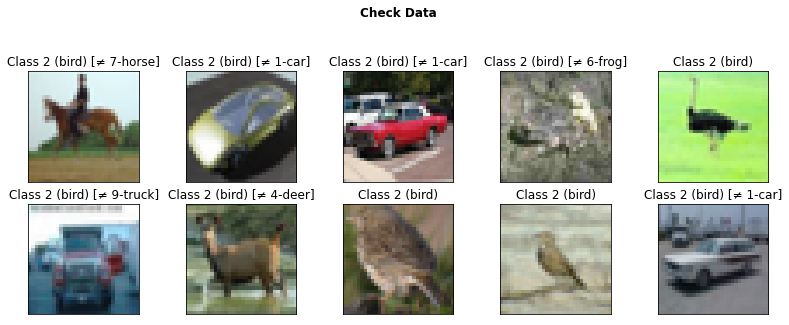

In [37]:
check_ten(X_test, predictions, y_test, True)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



